In [1]:
import sys

sys.path.append("../../")

from astronn.datasets import deltascuti, bedding, corot, starmodels
from astronn.utils import inferences
from astronn.utils.metrics import *
from astronn import models

import tensorflow as tf
tf.autograph.set_verbosity(0)
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

#### Load stars datasets

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


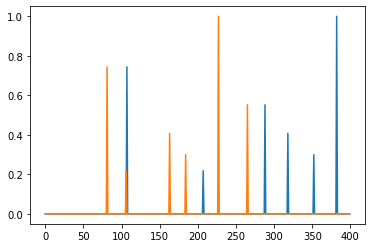

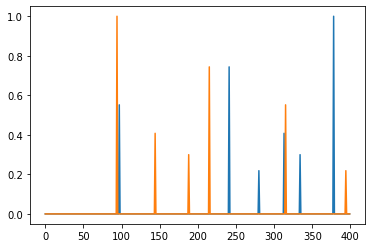

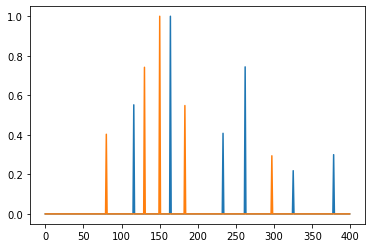

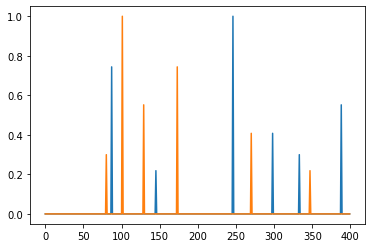

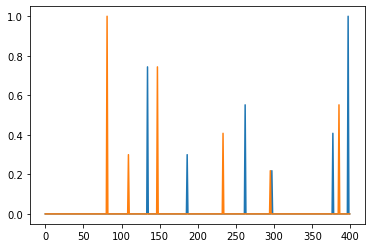

In [2]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
star_models = starmodels()

df_star_models = star_models.load(
    "/home/roberto/Downloads/evolutionTracks_line/norm8/*_norm",
    batch_size=1,
    add_noise=False,
)

count = 0
for star in df_star_models:
    plt.plot(star[0][0, :, 0])
    plt.plot(star[0][0, :, 1])
    plt.show()
    if count == 4:
        break
    else:
        count += 1

In [3]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
df_ds = deltascuti()
df_delta_scuti = df_ds.load(
    "../../astronn/data/deltascuti/preprocessed/*_norm", batch_size=1
)

# Read csv with other phisical paramters (L, Teff, ..)
csv_delta_scuti = pd.read_csv("../data/deltascuti/binaries_obs.csv")
csv_delta_scuti

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


,ID,Dnu_muHz,L,Teff,L.Ltot,parallax,mv,rho-gh17
0,KIC3858884,29,21.520774,6606,0.470,1.7800,9.3360,0.06570
1,KIC4544587,74,6.475306,7750,0.332,1.3600,10.8470,0.41400
2,KIC10661783,39,29.304625,7764,0.937,1.9400,9.5630,0.12550
3,HD172189,19,29.942319,7750,0.702,2.2700,8.8850,0.02830
4,CID100866999,56,3.865000,7300,NaN,0.5654,15.0970,0.26000
5,CID105906206,20,9.396579,6750,0.940,0.9901,12.2620,0.02986
6,HD159561,38,24.642612,8047,1.000,67.1300,2.1262,0.12400
7,KIC9851944,26,60.062351,6902,0.500,0.4100,11.4770,0.05660
8,KIC8262223,77,5.139949,9128,0.900,0.9832,12.8850,0.42300
9,KIC10080943,52,7.085301,7480,0.500,1.0600,11.7350,0.20500


In [4]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
bedding_stars = bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*_norm", batch_size=1)

# Read csv with other phisical paramters (L, Teff, ..)
csv_bedding = pd.io.parsers.read_csv(
    "../data/bedding/bedding_teff_logg_rad.csv", sep=","
)
csv_bedding

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


,HD,Name,TIC,V,Teff,L,e.L.,rho,e.rho.,Dnu,...,F0,logg,Teff_mast,e_logg,e_Teff_mast,stellar_radius,e_stellar_radius,L_mast,dnu_muhz,ID
0,2280.0,NaN,281499618,9.13,7510.0,5.52,0.26,0.49,0.06,7.17,...,19.5741,4.39426,7575.00,0.079169,138.757,1.39528,0.042407,5.774924,82.986111,TESS2018234235059-S0002-0000000281499618-0121-...
1,3622.0,NaN,43363194,7.77,7930.0,7.86,0.35,0.45,0.06,6.89,...,17.9829,4.33815,7779.00,0.080995,127.816,1.52225,0.043553,7.644720,79.745370,TESS2018263035959-S0003-0000000043363194-0123-...
2,10779.0,NaN,229139161,8.78,7730.0,8.13,0.36,0.39,0.05,6.80,...,17.8840,4.31312,7862.00,0.079127,143.816,1.57905,0.044208,8.582641,78.703704,TESS2018234235059-S0002-0000000229139161-0121-...
3,10961.0,NaN,231014033,9.39,7430.0,NaN,NaN,NaN,NaN,7.30,...,19.7100,4.30846,7600.00,0.080017,137.430,1.54452,0.052922,7.170244,84.490741,TESS2018263035959-S0003-0000000231014033-0123-...
4,17341.0,NaN,122615966,9.32,7810.0,10.05,0.50,0.32,0.05,5.90,...,16.1070,4.24043,7850.00,0.078290,131.083,1.71688,0.046400,10.084488,68.287037,TESS2018263035959-S0003-0000000122615966-0123-...
5,17693.0,NaN,122686610,7.80,7880.0,10.21,0.44,0.33,0.04,6.41,...,16.7301,4.24711,7940.00,0.074653,132.040,1.72004,0.047045,10.593836,74.189815,TESS2018263035959-S0003-0000000122686610-0123-...
6,20203.0,NaN,274038922,8.85,7970.0,8.06,0.38,0.45,0.05,7.20,...,19.8720,4.39860,8144.00,0.073741,167.493,1.47477,0.046296,8.619781,83.333333,TESS2018292075959-S0004-0000000274038922-0124-...
7,20232.0,NaN,159895674,6.88,8060.0,8.64,0.36,0.44,0.05,6.86,...,18.1104,4.33075,7963.00,0.072418,128.366,1.56787,0.043286,8.904756,79.398148,TESS2018263035959-S0003-0000000159895674-0123-...
8,24572.0,NaN,242944780,9.45,7410.0,7.25,0.36,0.35,0.05,7.20,...,18.5760,4.32415,7928.00,0.087546,473.676,1.57199,0.052960,8.795318,83.333333,TESS2018319095959-S0005-0000000242944780-0125-...
9,24975.0,NaN,44645679,7.24,7790.0,9.20,0.39,0.35,0.04,6.23,...,16.0734,4.23611,7693.00,0.077129,119.353,1.69752,0.047540,9.093042,72.106481,TESS2018319095959-S0005-0000000044645679-0125-...


### Load pretrainned NN model

In [5]:
sepconv_mod = tf.keras.models.load_model("/tmp/sepconvnn_tmp_dos_300/")
# sepconv_mod = tf.keras.models.load_model("/home/roberto/Projects/NN-Asteroseismology/astronn/models/weights/sepconvnn_tmp_dos_400")

sepconv_mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise (GaussianNoi  (None, 400, 2)           0         
 se)                                                             
                                                                 
 conv1d (Conv1D)             (None, 381, 20)           820       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 381, 20)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 372, 10)           2010      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 372, 10)          0         
 1D)                                                             
                                                        

### Load $\rho$ Roche models

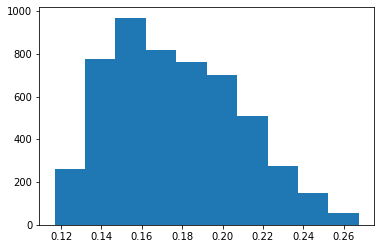

In [6]:
models = pd.read_csv(
    "/home/roberto/Downloads/evolutionTracks_line_rho_roche/models_params.csv",
    header=None,
    names=["Teff", "Dnu", "L_must", "rho_roche"],
)


def get_avg_rho_roche(teff, l, e_teff=300, e_l=1):
    """
    Get rho from Roche models by constrainning star models based
    on L and Teff. If there is not rsults, an adaptative search
    is performed
    """
    id_teff = models["Teff"].between(teff - e_teff, teff + e_teff, inclusive=True)
    id_l = models["L_must"].between(l - e_l, l + e_l, inclusive=True)
    max_adaptative_iters = 1
    iters_count = 0
    while len(models[(id_teff & id_l)]) == 0 and iters_count < max_adaptative_iters:
        e_teff += 0
        id_teff = models["Teff"].between(teff - e_teff, teff + e_teff, inclusive=True)
        iters_count += 1
        print(" ***warning, adaptative step performed on star models rho Roche search")
    return models[(id_teff & id_l)]["rho_roche"]


plt.hist(get_avg_rho_roche(6692.860521, 10))
plt.show()

In [7]:
models.head()

,Teff,Dnu,L_must,rho_roche
0,7003.698151,4.595945,8.958895,0.261513
1,6692.500519,3.939547,9.538349,0.181079
2,7273.390641,5.358647,8.319189,0.368718
3,6373.830677,3.417505,9.875435,0.129814
4,7272.217140,5.354516,8.322262,0.368199


## Results for 11 Binary DS Stars

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
KIC9851944


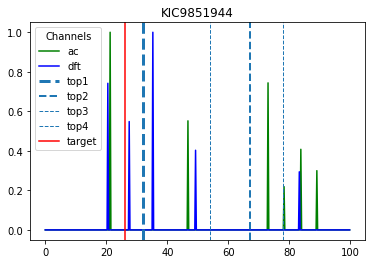

kic4544587


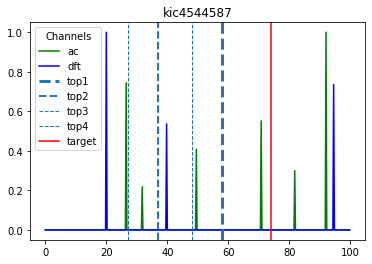

HD172189


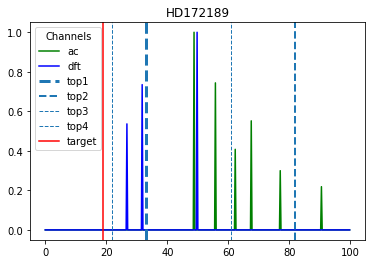

HD15082


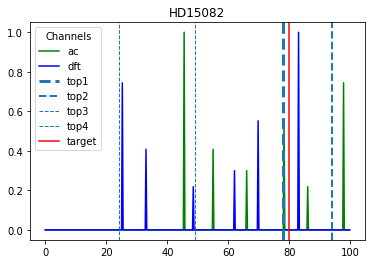

KIC8262223


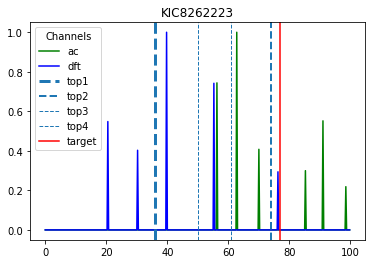

KIC3858884


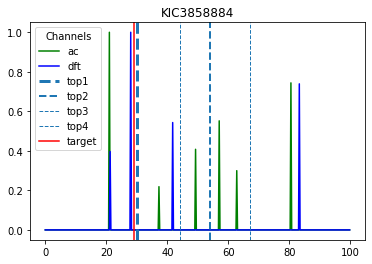

kic10661783


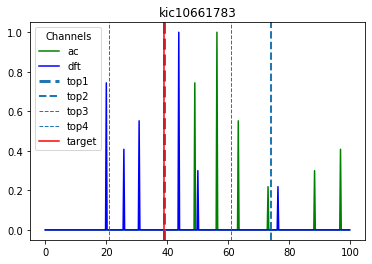

HD159561


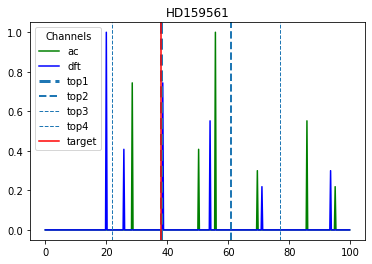

KIC10080943


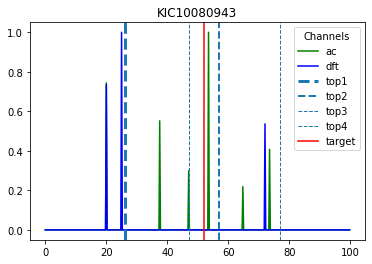

CID105906206


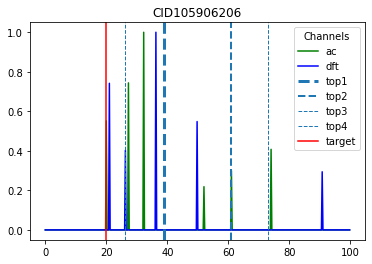

CID100866999


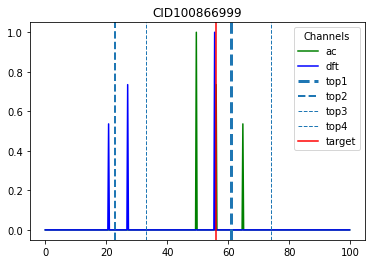

In [8]:
inf = inferences()
df_results_delta_scuti = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_delta_scuti,
    take_number=11,
    csv_L=csv_delta_scuti,
    debug=True,
)
df_results_delta_scuti.id = df_results_delta_scuti.id.str.upper()

In [9]:
df_results_delta_scuti

,id,dnu-target,top1,e-top1,top2,e-top2,top3,e-top3,top4,e-top4,...,rho-target,e-rho-target,rho-top1,e-rho-top1,rho-top2,e-rho-top2,rho-top3,e-rho-top3,rho-top4,e-rho-top4
0,KIC9851944,26,32,2.713031,67,2.255332,54,3.396142,78,3.322800,...,0.057596,0.018463,0.0876091,0.027919,0.389778,0.122379,0.252105,0.079417,0.52988,0.166065
1,KIC4544587,74,58,1.461276,37,3.466305,27,4.469766,48,0.656715,...,0.476425,0.149399,0.291253,0.091640,0.117466,0.037296,0.0621586,0.019904,0.198726,0.062738
2,HD172189,19,33,3.562535,82,1.427355,61,1.245331,22,1.253049,...,0.0305653,0.009899,0.0932276,0.029686,0.586206,0.183626,0.322487,0.101387,0.0410998,0.013245
3,HD15082,80,78,1.928818,94,1.707069,24,2.286055,49,1.337650,...,0.557684,0.174734,0.52988,0.166065,0.77244,0.241690,0.0489974,0.015746,0.207177,0.065380
4,KIC8262223,77,36,4.304487,74,2.115297,50,2.266196,61,1.782646,...,0.516247,0.161815,0.111142,0.035312,0.476425,0.149399,0.215807,0.068077,0.322487,0.101387
5,KIC3858884,29,30,2.593902,54,1.612199,67,2.082962,44,1.250943,...,0.0718109,0.022947,0.0769009,0.024550,0.252105,0.079417,0.389778,0.122379,0.166694,0.052719
6,KIC10661783,39,39,3.123489,74,1.953099,21,2.306416,61,1.571443,...,0.130646,0.041429,0.130646,0.041429,0.476425,0.149399,0.0374136,0.012076,0.322487,0.101387
7,HD159561,38,38,2.272150,61,2.173217,77,5.682866,22,2.092185,...,0.123968,0.039335,0.123968,0.039335,0.322487,0.101387,0.516247,0.161815,0.0410998,0.013245
8,KIC10080943,52,26,2.977213,57,1.692561,47,3.830471,77,4.676001,...,0.2336,0.073637,0.057596,0.018463,0.281199,0.088501,0.190451,0.060151,0.516247,0.161815
9,CID105906206,20,39,2.641858,61,2.112016,73,1.931342,26,3.850981,...,0.0339021,0.010961,0.130646,0.041429,0.322487,0.101387,0.463509,0.145372,0.057596,0.018463


In [10]:
# super simple model
"""
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(400, 2)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(df_delta_scuti, epochs=10)
"""

"\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(400, 2)),\n    keras.layers.Dense(128, activation='relu'),\n    keras.layers.Dense(100, activation='softmax')\n])\nmodel.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\nmodel.fit(df_delta_scuti, epochs=10)\n"

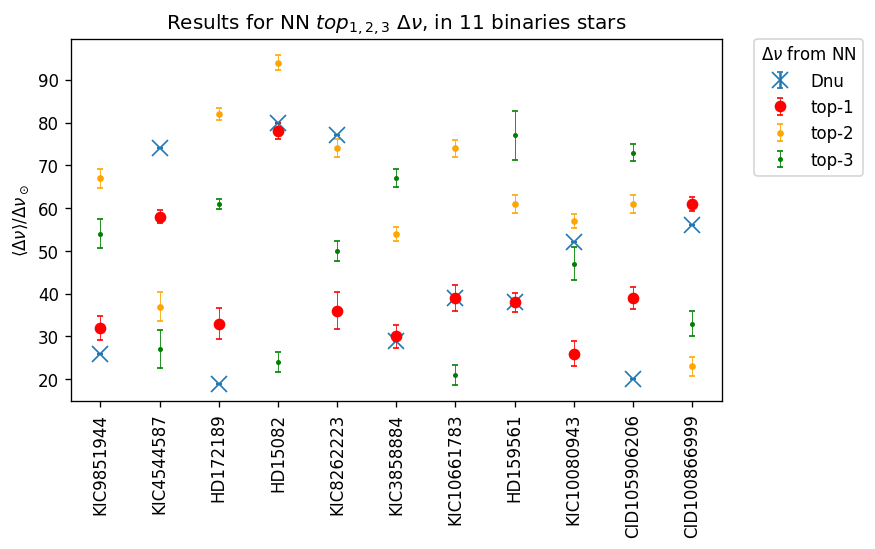

In [11]:
inf.plot_inferences(
    df_results_delta_scuti,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 11 binaries stars",
    plot_size=(7, 4),
)

In [12]:
df_results_delta_scuti_merged = df_results_delta_scuti.merge(
    csv_delta_scuti, left_on="id", right_on="ID", how="left"
).drop("ID", 1)
df_results_delta_scuti_merged

,id,dnu-target,top1,e-top1,top2,e-top2,top3,e-top3,top4,e-top4,...,e-rho-top3,rho-top4,e-rho-top4,Dnu_muHz,L,Teff,L.Ltot,parallax,mv,rho-gh17
0,KIC9851944,26,32,2.713031,67,2.255332,54,3.396142,78,3.322800,...,0.079417,0.52988,0.166065,26,60.062351,6902,0.500,0.4100,11.4770,0.05660
1,KIC4544587,74,58,1.461276,37,3.466305,27,4.469766,48,0.656715,...,0.019904,0.198726,0.062738,74,6.475306,7750,0.332,1.3600,10.8470,0.41400
2,HD172189,19,33,3.562535,82,1.427355,61,1.245331,22,1.253049,...,0.101387,0.0410998,0.013245,19,29.942319,7750,0.702,2.2700,8.8850,0.02830
3,HD15082,80,78,1.928818,94,1.707069,24,2.286055,49,1.337650,...,0.015746,0.207177,0.065380,80,6.140000,7430,0.000,0.0000,0.0000,0.50700
4,KIC8262223,77,36,4.304487,74,2.115297,50,2.266196,61,1.782646,...,0.068077,0.322487,0.101387,77,5.139949,9128,0.900,0.9832,12.8850,0.42300
5,KIC3858884,29,30,2.593902,54,1.612199,67,2.082962,44,1.250943,...,0.122379,0.166694,0.052719,29,21.520774,6606,0.470,1.7800,9.3360,0.06570
6,KIC10661783,39,39,3.123489,74,1.953099,21,2.306416,61,1.571443,...,0.012076,0.322487,0.101387,39,29.304625,7764,0.937,1.9400,9.5630,0.12550
7,HD159561,38,38,2.272150,61,2.173217,77,5.682866,22,2.092185,...,0.161815,0.0410998,0.013245,38,24.642612,8047,1.000,67.1300,2.1262,0.12400
8,KIC10080943,52,26,2.977213,57,1.692561,47,3.830471,77,4.676001,...,0.060151,0.516247,0.161815,52,7.085301,7480,0.500,1.0600,11.7350,0.20500
9,CID105906206,20,39,2.641858,61,2.112016,73,1.931342,26,3.850981,...,0.145372,0.057596,0.018463,20,9.396579,6750,0.940,0.9901,12.2620,0.02986


#### Select the closest $\text{top}_1$ or $\text{top}_2$ to the RM relation

In [13]:
# Select best from top1, top1/2 or top1*2
tops_ds = inferences.select_best_top1(
    df_results_delta_scuti_merged, target_column="rho-gh17"
)
# add tops to dataframe
df_results_delta_scuti_merged['top_corrected'] = tops_ds

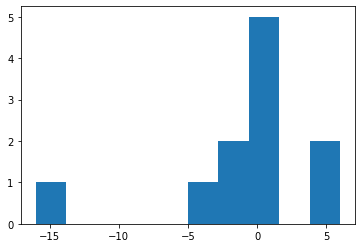

In [14]:
plt.hist(
    tops_ds.astype(float)
    - df_results_delta_scuti_merged["dnu-target"].values.astype(float),
    bins=10,
)
plt.show()

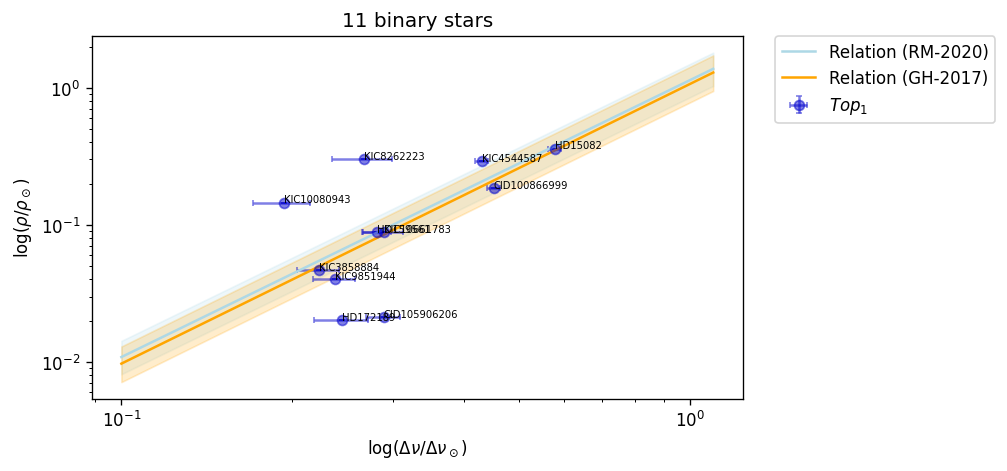

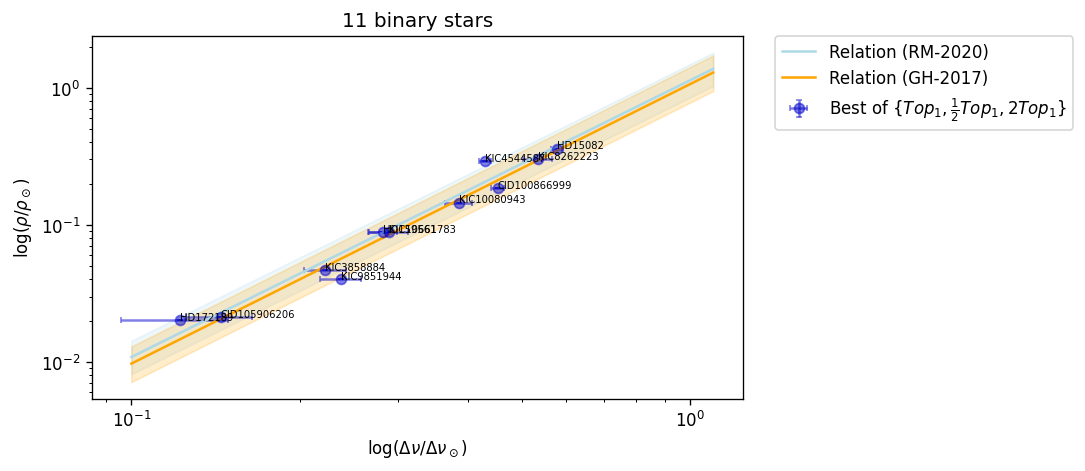

In [15]:
inferences.plot_relation_rodriguez(
    dnus=df_results_delta_scuti_merged["top1"].values.astype(float),
    rhos=df_results_delta_scuti_merged["rho-gh17"].values.astype(float),
    erhos=0,
    ednus=df_results_delta_scuti_merged["e-top1"].values.astype(float),
    points_ids=df_results_delta_scuti_merged["id"],
    plot_title="11 binary stars",
    points_label="$Top_1$",
)

inferences.plot_relation_rodriguez(
    dnus=tops_ds.astype(float),
    rhos=df_results_delta_scuti_merged["rho-gh17"].values.astype(float),
    erhos=0,
    ednus=df_results_delta_scuti_merged["e-top1"].values.astype(float),
    points_ids=df_results_delta_scuti_merged["id"],
    plot_title="11 binary stars",
    points_label="Best of $\{Top_{1}, \\frac{1}{2}Top_{1}, 2Top_{1} \}$",
)

## Results for 57 Bedding stars


In [16]:
df_results_bedding = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_bedding,
    take_number=57,
    csv_L=csv_bedding,
    debug=False,
)

In [17]:
df_results_bedding["TIC"] = df_results_bedding["id"].str.split("-").str[2].astype(int)
df_bedding_att = pd.io.parsers.read_csv(
    "../data/bedding/bedding_teff_logg_rad.csv", sep=",", index_col=0
)
df_bedding_att
df_bedding_att = df_bedding_att.head(57)
df_bedding_att["TIC"] = df_bedding_att["TIC"].astype(int)

# Merge
df_results_bedding_merged = df_results_bedding.merge(
    df_bedding_att, left_on="TIC", right_on="TIC", how="left"
)

# Replace L and Teff Bedding values, for MAST values when NaN
df_results_bedding_merged.L.fillna(df_results_bedding_merged.L_mast, inplace=True)
df_results_bedding_merged.Teff.fillna(df_results_bedding_merged.Teff_mast, inplace=True)

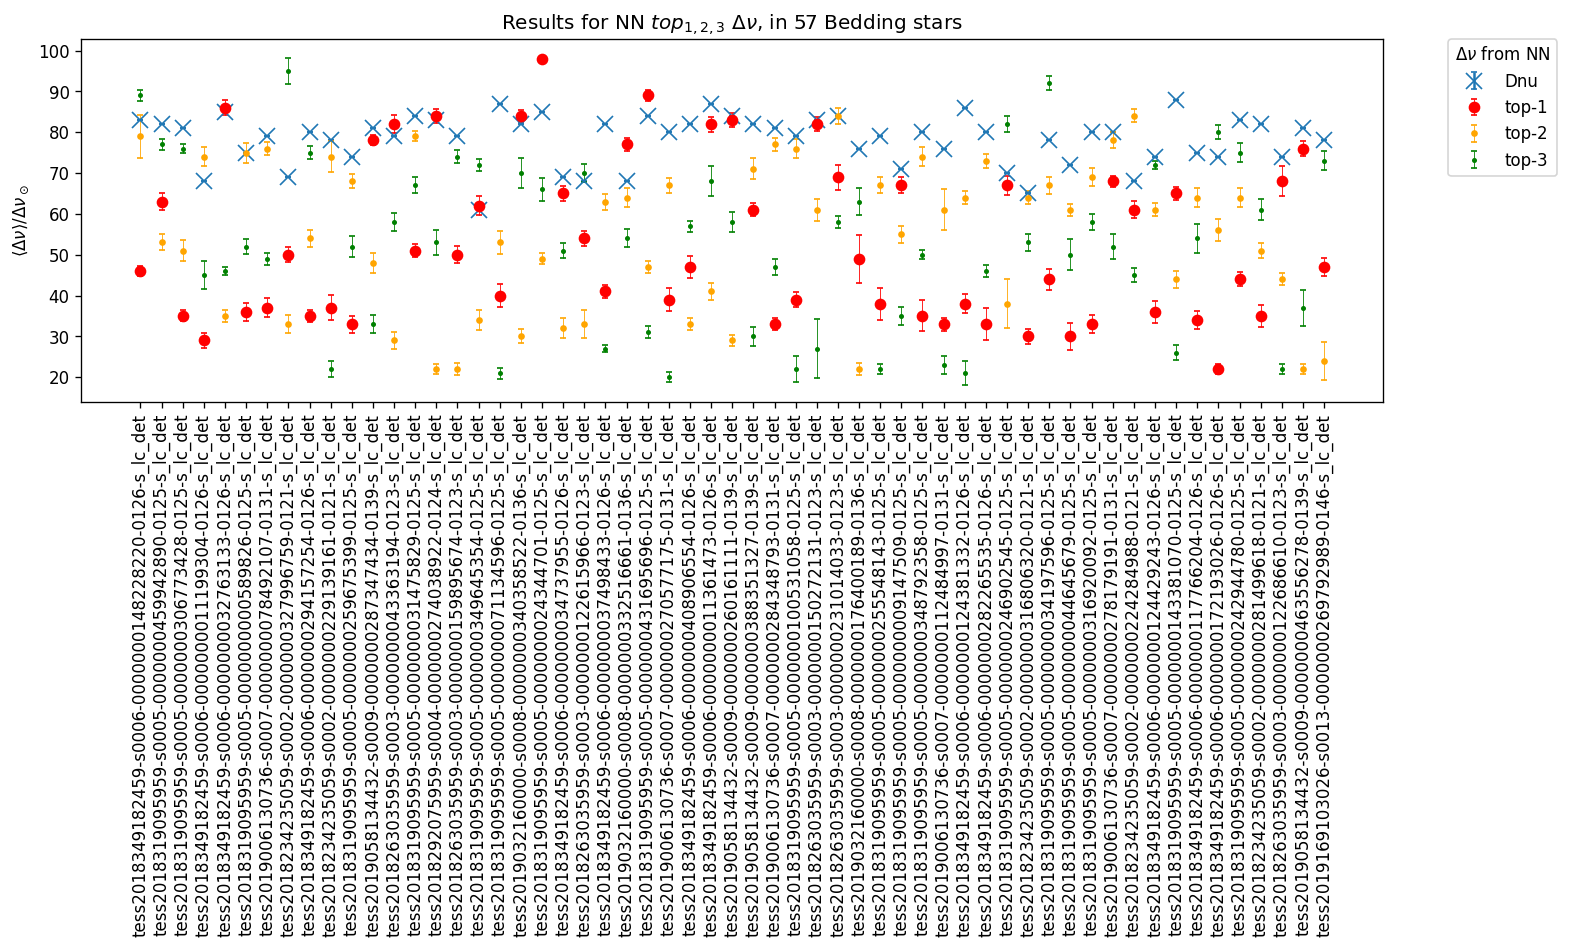

In [18]:
inf.plot_inferences(
    df_results_bedding_merged,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 57 Bedding stars",
    plot_size=(14, 4),
)

In [19]:
df_results_bedding_merged["avg_rho_roche"] = df_results_bedding_merged[
    ["Teff", "L"]
].apply(lambda x: np.average(get_avg_rho_roche(x["Teff"], x["L"])), axis=1)

"""
df_results_bedding_merged["sd_rho_roche"] = df_results_bedding_merged[
    ["Teff", "L"]
].apply(lambda x: np.std(get_avg_rho_roche(x["Teff"], x["L"])), axis=1)
"""

df_results_bedding_merged["sd_rho_roche"] = df_results_bedding_merged[
    ["Teff", "L"]
].apply(
    lambda x: np.mean(
        get_avg_rho_roche(x["Teff"], x["L"])
        - np.min(get_avg_rho_roche(x["Teff"], x["L"]))
    ),
    axis=1,
)
df_results_bedding_merged

 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search


/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search


,id,dnu-target,top1,e-top1,top2,e-top2,top3,e-top3,top4,e-top4,...,Teff_mast,e_logg,e_Teff_mast,stellar_radius,e_stellar_radius,L_mast,dnu_muhz,ID,avg_rho_roche,sd_rho_roche
0,tess2018349182459-s0006-0000000148228220-0126-...,83,46,1.250700,79,5.316791,89,1.304208,67,1.521941,...,7754.00,0.080885,137.469,1.87502,0.054950,11.450100,83.912037,TESS2018349182459-S0006-0000000148228220-0126-...,0.352090,0.113290
1,tess2018319095959-s0005-0000000459942890-0125-...,82,63,2.048158,53,1.951478,77,1.393552,97,1.466010,...,7085.00,0.105456,381.266,2.36596,0.089950,12.707763,82.870370,TESS2018319095959-S0005-0000000459942890-0125-...,0.180909,0.057724
2,tess2018319095959-s0005-0000000306773428-0125-...,81,35,1.347315,51,2.642381,76,1.164996,66,2.192610,...,7975.00,0.072827,145.016,1.71280,0.051588,10.691314,81.481481,TESS2018319095959-S0005-0000000306773428-0125-...,0.453923,0.131075
3,tess2018349182459-s0006-0000000011199304-0126-...,68,29,1.846201,74,2.379687,45,3.345323,55,2.154549,...,8670.00,0.072537,267.130,1.77317,0.058548,16.005526,68.981481,TESS2018349182459-S0006-0000000011199304-0126-...,0.459101,0.000000
4,tess2018349182459-s0006-0000000032763133-0126-...,85,86,1.878078,35,1.406152,46,1.057948,98,0.626829,...,8422.00,0.070944,138.208,1.61809,0.049156,11.867504,85.069444,TESS2018349182459-S0006-0000000032763133-0126-...,0.469828,0.135658
5,tess2018319095959-s0005-0000000000589826-0125-...,75,36,2.208168,75,2.453352,52,1.828646,22,1.169730,...,7943.00,0.073937,123.979,1.56992,0.040683,8.838681,75.462963,TESS2018319095959-S0005-0000000000589826-0125-...,0.517722,0.104625
6,tess2019006130736-s0007-0000000078492107-0131-...,79,37,2.357165,76,1.621723,49,1.476110,27,2.626595,...,7991.00,0.076419,129.278,1.60379,0.046101,9.449195,79.282407,TESS2019006130736-S0007-0000000078492107-0131-...,0.474578,0.138885
7,tess2018234235059-s0002-0000000327996759-0121-...,69,50,1.849147,33,2.200379,95,3.091584,84,1.587473,...,7527.00,NaN,NaN,2.53666,NaN,NaN,69.907407,TESS2018234235059-S0002-0000000327996759-0121-...,NaN,NaN
8,tess2018349182459-s0006-0000000294157254-0126-...,80,35,1.423134,54,2.068679,75,1.570801,24,2.908926,...,8003.00,0.072167,137.106,1.57505,0.048236,9.168380,80.092593,TESS2018349182459-S0006-0000000294157254-0126-...,0.493600,0.150976
9,tess2018234235059-s0002-0000000229139161-0121-...,78,37,3.067277,74,3.841133,22,1.902471,60,2.530703,...,7862.00,0.079127,143.816,1.57905,0.044208,8.582641,78.703704,TESS2018234235059-S0002-0000000229139161-0121-...,0.496390,0.119827


/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/roberto/anaconda3/envs/tensorflow_gpuenv/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


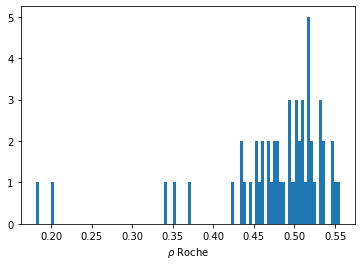

In [20]:
plt.hist(df_results_bedding_merged["avg_rho_roche"], bins=100)
plt.xlabel("$\\rho$ Roche")
plt.show()

In [21]:
tops_bedding = inferences.select_best_top1(
    df_results_bedding_merged, target_column="avg_rho_roche"
)
df_results_bedding_merged['top_corrected'] = tops_bedding

(array([ 1.,  1.,  2.,  2.,  6., 13., 18.,  7.,  4.,  3.]),
 array([-47. , -40.2, -33.4, -26.6, -19.8, -13. ,  -6.2,   0.6,   7.4,
         14.2,  21. ]),
 <a list of 10 Patch objects>)

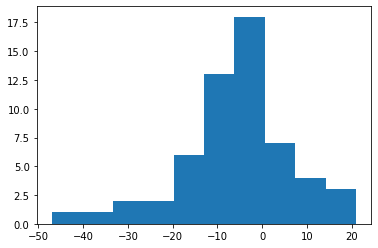

In [22]:
plt.hist(tops_bedding.astype(float)-df_results_bedding_merged["dnu-target"].values.astype(float))

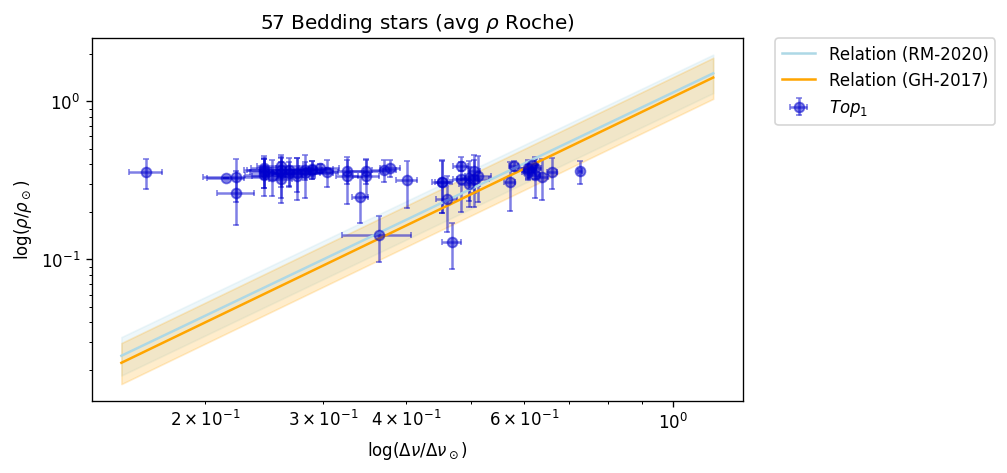

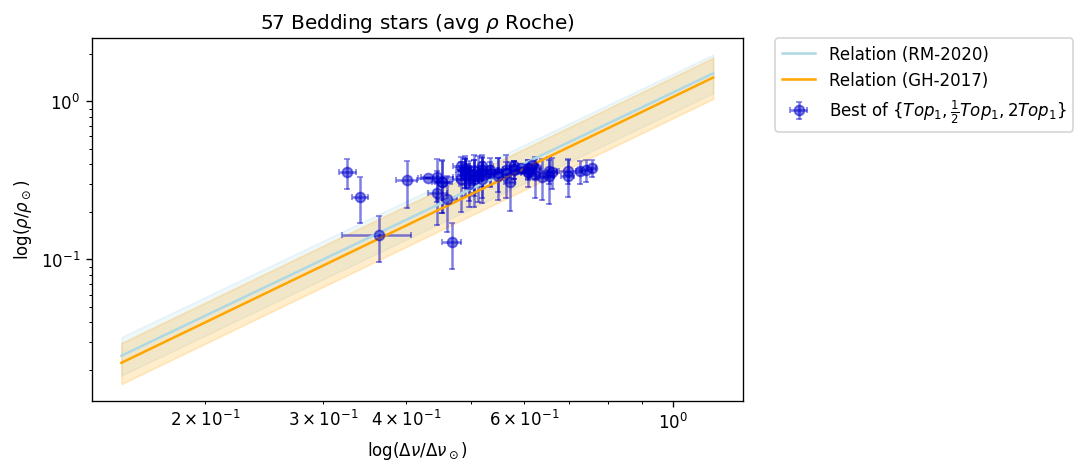

In [23]:
inferences.plot_relation_rodriguez(
    dnus=df_results_bedding_merged["top1"].values.astype(float),
    rhos=df_results_bedding_merged["avg_rho_roche"].values.astype(float),
    erhos=df_results_bedding_merged["sd_rho_roche"].values.astype(float),
    ednus=df_results_bedding_merged["e-top1"].values.astype(float),
    points_ids=None,
    plot_title="57 Bedding stars (avg $\\rho$ Roche)",
    points_label="$Top_1$",
    relation_line_range=(0.15, 1.3),
)

inferences.plot_relation_rodriguez(
    dnus=tops_bedding.astype(float),
    rhos=df_results_bedding_merged["avg_rho_roche"].values.astype(float),
    erhos=df_results_bedding_merged["sd_rho_roche"].values.astype(float),
    ednus=df_results_bedding_merged["e-top1"].values.astype(float),
    points_ids=None,
    plot_title="57 Bedding stars (avg $\\rho$ Roche)",
    points_label="Best of $\{Top_{1}, \\frac{1}{2}Top_{1}, 2Top_{1} \}$",
    relation_line_range=(0.15, 1.3),
)

### Histogram of $\rho$ Roche distributions for every single star (57 Bedding stars)

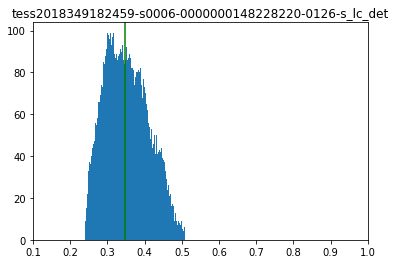

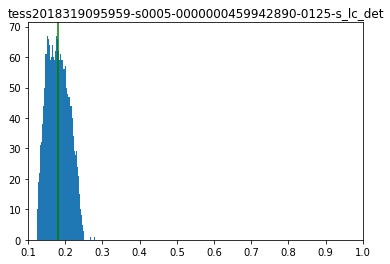

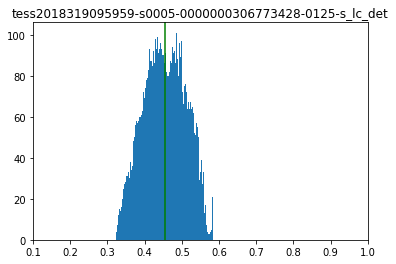

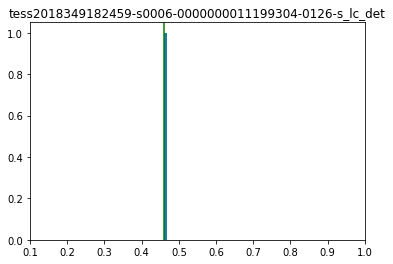

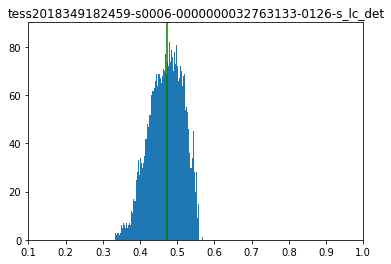

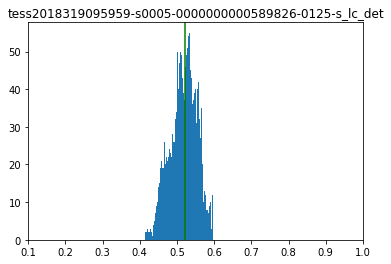

In [24]:
for i, row in df_results_bedding_merged.iterrows():
    avg_rho_roche = np.median(get_avg_rho_roche(row["Teff"], row["L"]))
    plt.hist(get_avg_rho_roche(row["Teff"], row["L"]), bins=100)
    plt.axvline(x=avg_rho_roche, color="green")
    plt.title(row["id"])
    plt.xlim(0.1, 1.0)
    plt.show()
    if i == 5:
        break

# CoRoT Stars

In [25]:
# Read datasets of preprocessed stars
df_corot = corot()
df_cor = df_corot.load("../../astronn/data/corot/preprocessed/*_norm", batch_size=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [26]:
df_results_corot = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_cor,
    take_number=75,
    csv_L=None,
    debug=False,
    dnu_target=False,
)

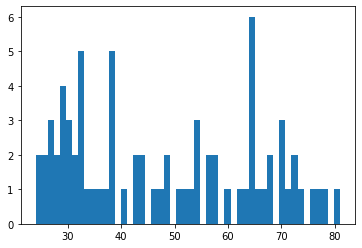

In [27]:
plt.hist(df_results_corot["top1"], bins=50)
plt.show()

In [28]:
# Add L and Teff directly from star data
df_results_corot["L"] = np.nan
df_results_corot["Teff"] = np.nan

for star in df_cor.take(75):
    # id = int(star[0].numpy()[0].decode("utf-8"))
    id = star[0].numpy()[0].decode("utf-8")
    # Loc star
    df_results_corot.loc[df_results_corot.id == str(id), ["Teff"]] = star[3].numpy()[0]
    df_results_corot.loc[df_results_corot.id == str(id), ["L"]] = star[4].numpy()[0]

In [29]:
"""
df_results_corot[df_results_corot['L'] == 0]

df_results_corot["L_mast"] = np.nan
df_results_corot["Teff_mast"] = np.nan


from astroquery.mast import Observations, Catalogs

for star_name in ["TIC %s" % str(e) for e in df_results_corot["id"].values]:
    try:
        catalogTIC = Catalogs.query_object(
            star_name, radius=0.00033, catalog="TIC", mission="TESS", data_release=8.2
        )
        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["L_mast"]] = catalogTIC["lum"]
        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["Teff_mast"]] = catalogTIC["Teff"]
    except:
        print("Problems in %s" % star_name)
"""


'\ndf_results_corot[df_results_corot[\'L\'] == 0]\n\ndf_results_corot["L_mast"] = np.nan\ndf_results_corot["Teff_mast"] = np.nan\n\n\nfrom astroquery.mast import Observations, Catalogs\n\nfor star_name in ["TIC %s" % str(e) for e in df_results_corot["id"].values]:\n    try:\n        catalogTIC = Catalogs.query_object(\n            star_name, radius=0.00033, catalog="TIC", mission="TESS", data_release=8.2\n        )\n        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["L_mast"]] = catalogTIC["lum"]\n        df_results_corot.loc[df_results_corot.id == star_name.split(" ")[1], ["Teff_mast"]] = catalogTIC["Teff"]\n    except:\n        print("Problems in %s" % star_name)\n'

In [30]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(df_results_corot)

             id  logg-target top1    e-top1 top2    e-top2 top3    e-top3  \
0   102599598.0        4.000   46  1.774638   24  1.221779   34  2.207893   
1   102677987.0        3.950   64  2.520492   37  2.648434   86  1.871610   
2   102669422.0        3.675   36  2.261194   63  2.153110   22  1.580609   
3   102624107.0        4.050   33  1.986061   44  1.987546   70  2.153838   
4   102745499.0        3.850   38  1.870409   53  3.167343   67  1.877781   
5   102576929.0        4.050   54  2.066862   37  2.633060   23  1.635575   
6   102728240.0        4.200   63  1.644837   34  1.604972   22  1.381773   
7   102589546.0        3.700   70  2.956046   33  3.019106   54  2.449011   
8   102671284.0        3.650   30  1.849355   46  2.101599   70  1.688213   
9   102649349.0        3.950   49  2.179646   24  2.667743   37  3.791162   
10  102790482.0        3.475   27  2.592650   54  2.652030   40  1.667023   
11  102704304.0        3.250   43  1.877093   72  4.764089   25  7.768493   

In [31]:
"""
plt.scatter(df_results_corot["Teff"], df_results_corot["Teff_mast"])
plt.ylabel("Teff MAST")
plt.xlabel("Teff Paparó")
plt.show()
"""

'\nplt.scatter(df_results_corot["Teff"], df_results_corot["Teff_mast"])\nplt.ylabel("Teff MAST")\nplt.xlabel("Teff Paparó")\nplt.show()\n'

In [32]:
"""
plt.hist(df_results_corot[df_results_corot["L"]<1000]["L"], label="L")
plt.hist(df_results_corot[df_results_corot["L"]<1000]["L_mast"], label="L MAST")
plt.legend()
plt.show()
"""

'\nplt.hist(df_results_corot[df_results_corot["L"]<1000]["L"], label="L")\nplt.hist(df_results_corot[df_results_corot["L"]<1000]["L_mast"], label="L MAST")\nplt.legend()\nplt.show()\n'

In [33]:
df_results_corot["avg_rho_roche"] = df_results_corot[["Teff", "L"]].apply(
    lambda x: np.mean(get_avg_rho_roche(x["Teff"], x["L"])), axis=1
)


df_results_corot["sd_rho_roche"] = df_results_corot[
    ["Teff", "L"]
].apply(lambda x: np.std(get_avg_rho_roche(x["Teff"], x["L"])), axis=1) 
df_results_corot

"""
df_results_corot["sd_rho_roche"] = df_results_corot[["Teff", "L"]].apply(
    lambda x: np.mean(
        get_avg_rho_roche(x["Teff"], x["L"])
        - np.min(get_avg_rho_roche(x["Teff"], x["L"]))
    ),
    axis=1,
)
"""
df_results_corot

 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***warning, adaptative step performed on star models rho Roche search
 ***wa

,id,logg-target,top1,e-top1,top2,e-top2,top3,e-top3,top4,e-top4,...,rho-top2,e-rho-top2,rho-top3,e-rho-top3,rho-top4,e-rho-top4,L,Teff,avg_rho_roche,sd_rho_roche
0,102599598.0,4.000,46,1.774638,24,1.221779,34,2.207893,79,2.686458,...,0.0489974,0.015746,0.0990225,0.031506,0.543692,0.170372,9.757,7600.0,0.407264,0.067827
1,102677987.0,3.950,64,2.520492,37,2.648434,86,1.871610,23,1.839647,...,0.117466,0.037296,0.645406,0.202083,0.0449611,0.014468,13.089,7700.0,0.309110,0.095241
2,102669422.0,3.675,36,2.261194,63,2.153110,22,1.580609,74,3.527416,...,0.344203,0.108163,0.0410998,0.013245,0.476425,0.149399,5.911,7300.0,0.505188,0.057362
3,102624107.0,4.050,33,1.986061,44,1.987546,70,2.153838,57,0.994609,...,0.166694,0.052719,0.425838,0.133625,0.281199,0.088501,4.930,8400.0,NaN,NaN
4,102745499.0,3.850,38,1.870409,53,3.167343,67,1.877781,22,1.740999,...,0.242764,0.076499,0.389778,0.122379,0.0410998,0.013245,15.005,7900.0,0.263908,0.032049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,102587554.0,3.700,34,1.942024,63,2.463151,49,2.610732,77,2.387429,...,0.344203,0.108163,0.207177,0.065380,0.516247,0.161815,6.865,7375.0,0.480312,0.061492
71,102787451.0,4.000,38,2.355142,56,3.351499,23,1.962251,71,1.809260,...,0.271323,0.085418,0.0449611,0.014468,0.438216,0.137485,6.220,7300.0,0.496009,0.056918
72,102655408.0,4.000,68,1.975502,46,1.666495,33,1.927430,56,1.125270,...,0.182355,0.057618,0.0932276,0.029686,0.271323,0.085418,3.609,7375.0,NaN,NaN
73,101723199.0,3.225,27,2.122703,81,1.881249,44,2.270620,54,1.483313,...,0.571855,0.179152,0.166694,0.052719,0.252105,0.079417,0.000,6225.0,NaN,NaN


In [34]:
tops_corot = inferences.select_best_top1(df_results_corot, target_column="avg_rho_roche")
df_results_corot['top_corrected'] = tops_corot

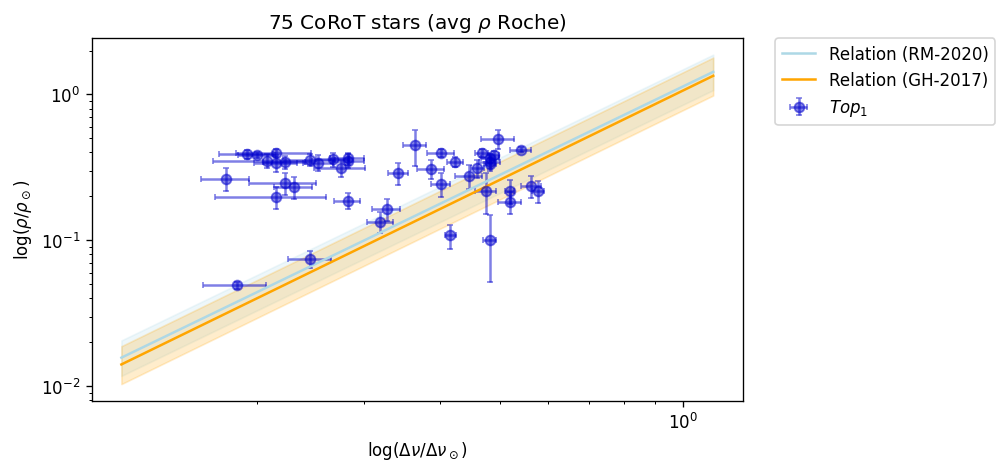

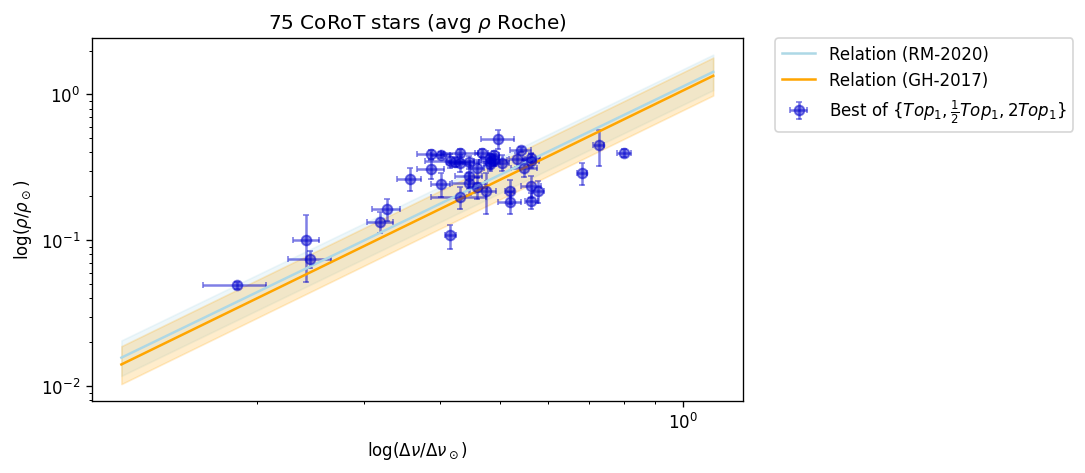

In [35]:
inferences.plot_relation_rodriguez(
    dnus=df_results_corot["top1"].values.astype(float),
    rhos=df_results_corot["avg_rho_roche"].values.astype(float),
    erhos=df_results_corot["sd_rho_roche"].values.astype(float),
    ednus=df_results_corot["e-top1"].values.astype(float),
    # points_ids=df_results_corot["id"],
    points_ids=None,
    plot_title="75 CoRoT stars (avg $\\rho$ Roche)",
    points_label="$Top_1$",
    relation_line_range=(0.12, 1.3),
    # xlim=(0, 0.4),
    # ylim=(0.15, 0.5)
)

inferences.plot_relation_rodriguez(
    dnus=tops_corot.astype(float),
    rhos=df_results_corot["avg_rho_roche"].values.astype(float),
    erhos=df_results_corot["sd_rho_roche"].values.astype(float),
    ednus=df_results_corot["e-top1"].values.astype(float),
    # points_ids=df_results_corot["id"],
    points_ids=None,
    plot_title="75 CoRoT stars (avg $\\rho$ Roche)",
    points_label="Best of $\{Top_{1}, \\frac{1}{2}Top_{1}, 2Top_{1} \}$",
    relation_line_range=(0.12, 1.3),
    # xlim=(0.2, 0.6),
    # ylim=(0.12, 0.5)
)

### Main metrics

Stars in $\rho$ range

In [36]:
ds_in_range = (
    df_results_delta_scuti_merged[["top_corrected", "e-top1", "rho-gh17"]]
    .apply(
        lambda x: inferences.check_dnu_in_RM_relation(
            x["top_corrected"], x["e-top1"], x["rho-gh17"]
        ),
        axis=1,
    )
    .value_counts()
)

bedding_in_range = (
    df_results_bedding_merged[
        ["top_corrected", "e-top1", "avg_rho_roche", "sd_rho_roche"]
    ]
    .apply(
        lambda x: inferences.check_dnu_in_RM_relation(
            x["top_corrected"], x["e-top1"], x["avg_rho_roche"], x["sd_rho_roche"]
        ),
        axis=1,
    )
    .value_counts()
)

corot_in_range = (
    df_results_corot[["top_corrected", "e-top1", "avg_rho_roche", "sd_rho_roche"]]
    .apply(
        lambda x: inferences.check_dnu_in_RM_relation(
            x["top_corrected"], x["e-top1"], x["avg_rho_roche"], x["sd_rho_roche"]
        ),
        axis=1,
    )
    .value_counts()
)


# Create the pandas DataFrame
df_ranges = pd.DataFrame(
    [ds_in_range.values, bedding_in_range.values, corot_in_range.values],
    columns=["In", "Out"],
)
df_ranges.index = ["Delta Scuti", "Bedding", "Corot"]
df_ranges["total"] = df_ranges["In"] + df_ranges["Out"]
df_ranges["ratio"] = df_ranges["In"] / df_ranges["total"]
df_ranges

,In,Out,total,ratio
Delta Scuti,10,1,11,0.909091
Bedding,40,17,57,0.701754
Corot,62,13,75,0.826667


#### MSE (all stars) 

In [37]:
def mse(y, yhat):
    """
    """
    return np.mean(y - yhat)


mse_errors = {}
mse_errors["ds"] = mse(
    df_results_delta_scuti_merged["dnu-target"].values.astype(float),
    df_results_delta_scuti_merged["top_corrected"].values.astype(float),
)

mse_errors["bedding"] = mse(
    df_results_bedding_merged["dnu-target"].values.astype(float),
    df_results_bedding_merged["top_corrected"].values.astype(float),
)

mse_errors["corot"] = mse(
    df_results_corot["logg-target"].values.astype(float),
    get_rho(df_results_corot["top_corrected"].values.astype(float) / dnu_sun),
)

print(mse_errors)

{'ds': 1.2727272727272727, 'bedding': 6.087719298245614, 'corot': 3.547542278672354}


#### MSE (only stars IN RELATION RANGE) 

In [38]:
ds_index_inrange = df_results_delta_scuti_merged[
    ["top_corrected", "e-top1", "rho-gh17"]
].apply(
    lambda x: inferences.check_dnu_in_RM_relation(
        x["top_corrected"], x["e-top1"], x["rho-gh17"]
    ),
    axis=1,
)

bedding_index_inrange = df_results_bedding_merged[
    ["top_corrected", "e-top1", "avg_rho_roche", "sd_rho_roche"]
].apply(
    lambda x: inferences.check_dnu_in_RM_relation(
        x["top_corrected"], x["e-top1"], x["avg_rho_roche"], x["sd_rho_roche"]
    ),
    axis=1,
)


corot_index_inrange = df_results_corot[
    ["top_corrected", "e-top1", "avg_rho_roche", "sd_rho_roche"]
].apply(
    lambda x: inferences.check_dnu_in_RM_relation(
        x["top_corrected"], x["e-top1"], x["avg_rho_roche"], x["sd_rho_roche"]
    ),
    axis=1,
)


mse_errors = {}
mse_errors["ds"] = mse(
    df_results_delta_scuti_merged[ds_index_inrange]["dnu-target"].values.astype(float),
    df_results_delta_scuti_merged[ds_index_inrange]["top_corrected"].values.astype(
        float
    ),
)

mse_errors["bedding"] = mse(
    df_results_bedding_merged[bedding_index_inrange]["dnu-target"].values.astype(float),
    df_results_bedding_merged[bedding_index_inrange]["top_corrected"].values.astype(
        float
    ),
)

mse_errors["corot"] = mse(
    np.log10(
        df_results_corot[corot_index_inrange]["logg-target"].values.astype(float)
        / 0.0864
    ),
    np.log10(
        get_rho(
            (
                df_results_corot[corot_index_inrange]["top_corrected"].values.astype(
                    float
                )
                / dnu_sun
            )
        )
    ),
)

mse_errors

{'ds': -0.2, 'bedding': 4.294117647058823, 'corot': 2.17709050923544}